#  用课程所学内容实现各类图像增广
>常用图像增广方法主要有：左右翻转(上下翻转对于许多目标并不常用)，随机裁剪，变换颜色(亮度，对比度，饱和度和色调)等等，我们拟用opencv-python实现部分数据增强方法。<br>
>结构如下：

```
class FunctionClass:
    def __init__(self, parameter):
        self.parameter=parameter

    def __call__(self, img):       


```

## 要求
* 1.补全代码
* 2.验证增强效果
* 3.可自选实现其他增强效果



In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

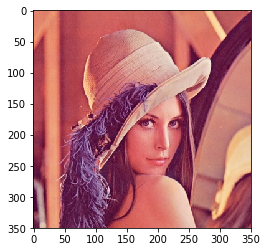

In [2]:
filename = 'lena.jpg'
## [Load an image from a file]
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
print(img.shape)

(350, 350, 3)


## 1.图片缩放

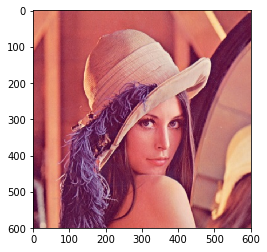

In [4]:
class Resize:
    def __init__(self, size):
        self.size=size

    def __call__(self, img):

        # 此处插入代码
        return cv2.resize(img, self.size)



resize=Resize( (600, 600))
img2=resize(img)
plt.imshow(img2)

## 2.图片翻转

In [5]:
import random

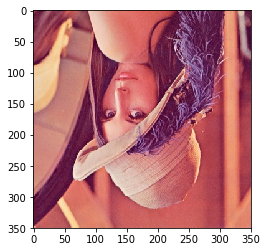

In [6]:
class Flip:
    def __init__(self, mode):
        self.mode=mode

    def __call__(self, img):

        # 此处插入代码
        return cv2.flip(img, self.mode)

# 指定翻转类型（非随机）
# mode=0垂直翻转、1水平翻转、-1水平加垂直翻转
flip=Flip(mode=-1)
img2=flip(img)
plt.imshow(img2)

In [7]:
# 随机翻转,课堂所讲

class Flip(object):
    
    def __init__(self, mode=1):
        # 设置一个翻转参数，1、0或-1,默认1
        assert mode in [-1, 0, 1], "mode should be a value in [-1, 0, 1]"
        self.mode = mode

    def __call__(self, img):
        # 随机生成0或1（即是否翻转）
        if random.randint(0, 1) == 1:
            return cv2.flip(img, self.mode)
        else:
            return img


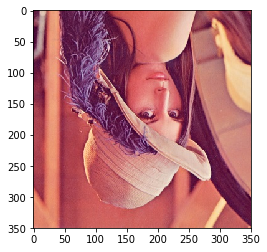

In [10]:
flip=Flip(0)
img2=flip(img)
plt.imshow(img2)

## 3图片旋转

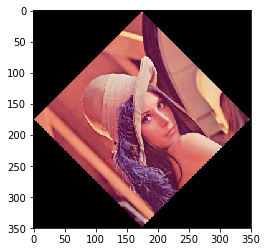

In [11]:
class Rotate:
    def __init__(self, degree,size):
        self.degree=degree
        self.size=size

    def __call__(self, img):

        # 此处插入代码
        h, w = img.shape[:2]
        center = (w // 2, h // 2) # 采取中心点为轴进行旋转
        M = cv2.getRotationMatrix2D(center,self.degree, self.size)
        return cv2.warpAffine(img, M, (w, h))


# 参数1是旋转角度，参数2是图像比例
rotate=Rotate( 45, 0.7)
img2=rotate(img)
plt.imshow(img2)

## 4.图片亮度调节

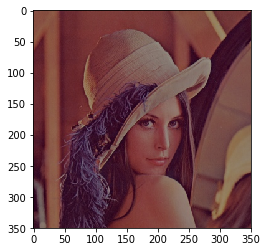

In [12]:
class Brightness:
    def __init__(self,brightness_factor):
        self.brightness_factor=brightness_factor

    def __call__(self, img):

        # 此处插入代码
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # 通过cv2.cvtColor把图像从BGR转换到HSV
        darker_hsv = img_hsv.copy()
        darker_hsv[:, :, 2] =  self.brightness_factor * darker_hsv[:, :, 2]
        return cv2.cvtColor(darker_hsv, cv2.COLOR_HSV2BGR)
        
brightness=Brightness(0.6)
img2=brightness(img)
plt.imshow(img2)

## 5.图片随机裁剪

In [15]:
import random
import math

class RandCropImage(object):
    """ random crop image """
    """ 随机裁剪图片 """

    def __init__(self, size, scale=None, ratio=None, interpolation=-1):

        self.interpolation = interpolation if interpolation >= 0 else None
        if type(size) is int:
            self.size = (size, size)  # (h, w)
        else:
            self.size = size

        self.scale = [0.08, 1.0] if scale is None else scale
        self.ratio = [3. / 4., 4. / 3.] if ratio is None else ratio

    def __call__(self, img):
        size = self.size
        scale = self.scale
        ratio = self.ratio

        aspect_ratio = math.sqrt(random.uniform(*ratio))
        w = 1. * aspect_ratio
        h = 1. / aspect_ratio

        img_h, img_w = img.shape[:2]

        bound = min((float(img_w) / img_h) / (w**2),
                    (float(img_h) / img_w) / (h**2))
        scale_max = min(scale[1], bound)
        scale_min = min(scale[0], bound)

        target_area = img_w * img_h * random.uniform(scale_min, scale_max)
        target_size = math.sqrt(target_area)
        w = int(target_size * w)
        h = int(target_size * h)

        i = random.randint(0, img_w - w)
        j = random.randint(0, img_h - h)

        img = img[j:j + h, i:i + w, :]
        if self.interpolation is None:
            return cv2.resize(img, size)
        else:
            return cv2.resize(img, size, interpolation=self.interpolation)

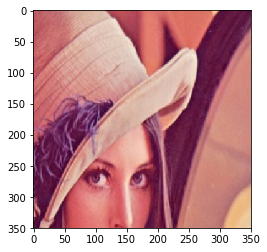

In [16]:
crop = RandCropImage(350)
plt.imshow(crop(img))

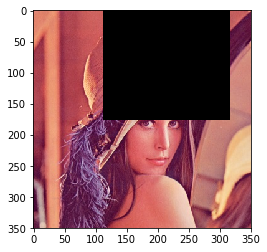

In [18]:
# 随机裁剪
class RandomErasing(object):
    def __init__(self, EPSILON=0.5, sl=0.02, sh=0.4, r1=0.3,
                 mean=[0., 0., 0.]):
        self.EPSILON = EPSILON
        self.mean = mean
        self.sl = sl
        self.sh = sh
        self.r1 = r1

    def __call__(self, img):
        if random.uniform(0, 1) > self.EPSILON:
            return img

        for attempt in range(100):
            area = img.shape[0] * img.shape[1]

            target_area = random.uniform(self.sl, self.sh) * area
            aspect_ratio = random.uniform(self.r1, 1 / self.r1)

            h = int(round(math.sqrt(target_area * aspect_ratio)))
            w = int(round(math.sqrt(target_area / aspect_ratio)))
            #print(w)

            
            # 此处插入代码
            if w < img.shape[0] and h < img.shape[1]:
                x1 = random.randint(0, img.shape[1] - h)
                y1 = random.randint(0, img.shape[0] - w)
                if img.shape[2] == 3:
                    img[ x1:x1 + h, y1:y1 + w, 0] = self.mean[0]
                    img[ x1:x1 + h, y1:y1 + w, 1] = self.mean[1]
                    img[ x1:x1 + h, y1:y1 + w, 2] = self.mean[2]
                else:
                    img[x1:x1 + h, y1:y1 + w,0] = self.mean[0]
                return img 
        return img


erase = RandomErasing()
img2=erase(img)
plt.imshow(img2)    

## 6.图片其它处理

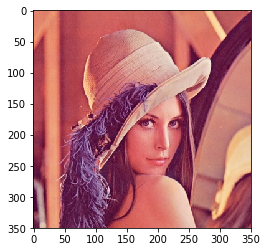

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

filename = 'lena.jpg'
## [Load an image from a file]
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## 6.1.图片边缘填充

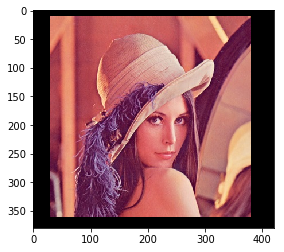

In [4]:
# 图片边缘填充
class Pooling:
    def __init__(self,pooling1,pooling2,pooling3,pooling4):
        self.pooling1=pooling1
        self.pooling2=pooling2
        self.pooling3=pooling3
        self.pooling4=pooling4

    def __call__(self, img):

        # 全0填充,若填充其它颜色，需修改下面value中数值即可
        img_pool = cv2.copyMakeBorder(img, self.pooling1, self.pooling2, self.pooling3, self.pooling4, 
                                       cv2.BORDER_CONSTANT, 
                                       value=(0, 0, 0))
        return img_pool
        
# Pooling()中的4个参数分别是，上下左右填充的像素大小
pooling=Pooling(10,20,30,40)
img2=pooling(img)
plt.imshow(img2)

## 6.2.修改图片饱和度

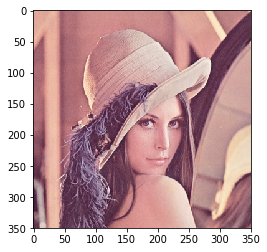

In [8]:
# 修改图片饱和度
class Saturation:
    def __init__(self,saturation_factor):
        self.saturation_factor=saturation_factor

    def __call__(self, img):

        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # 通过cv2.cvtColor把图像从BGR转换到HSV
        colorless_hsv = img_hsv.copy()
        colorless_hsv[:, :, 1] = self.saturation_factor * colorless_hsv[:, :, 1]
        return cv2.cvtColor(colorless_hsv, cv2.COLOR_HSV2BGR)

        
saturation=Saturation(0.6)
img2=saturation(img)
plt.imshow(img2)

## 6.3.放大+平移

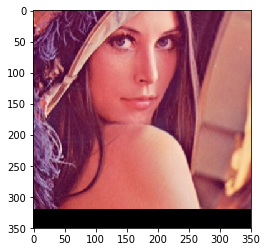

In [20]:
# 放大+平移
class AmplificationTranslation:
    def __init__(self,mode1,mode2,mode3):
        self.mode1=mode1
        self.mode2=mode2
        self.mode3=mode3

    def __call__(self, img):

        M_crop = np.array([
        [self.mode1, 0, self.mode2],
        [0, self.mode1, self.mode3]
        ], dtype=np.float32)

        img = cv2.warpAffine(img, M_crop, (img.shape[0], img.shape[1]))
        return img

# 将彩色图的BGR通道顺序转成RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   
     
# AmplificationTranslation()中，参数分别是：放大倍数、平移坐标(-150,-240)
ATion=AmplificationTranslation(1.6,-150,-240)
img2=ATion(img)
plt.imshow(img2)

## 6.4.x轴的剪切变换，角度15°

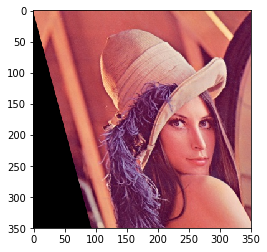

In [22]:
class ShearAngle:
    def __init__(self,mode):
        self.mode=mode

    def __call__(self, img):

        # x轴的剪切变换，角度15°
        theta = self.mode * np.pi / 180
        M_shear = np.array([
        [1, np.tan(theta), 0],
        [0, 1, 0]
        ], dtype=np.float32)

        img_sheared = cv2.warpAffine(img, M_shear, (img.shape[0], img.shape[1]))
        return img_sheared

# 将彩色图的BGR通道顺序转成RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   
     
# ShearAngle()中，参数是：角度
SAion=ShearAngle(15)
img2=SAion(img)
plt.imshow(img2)